In [ ]:
# DAVIS Dataset Exploration and Feature Extraction

This notebook explores the DAVIS dataset which contains drug-target interaction data with SMILES, FASTA, and affinity information.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Descriptors
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)


## 1. Load and Explore the Dataset


In [2]:
# Load the DAVIS dataset
df = pd.read_csv('../data/davis.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
df.head()


Dataset shape: (25772, 5)
Columns: ['Drug_ID', 'Drug', 'Target_ID', 'Target', 'Y']

First 5 rows:


,Drug_ID,Drug,Target_ID,Target,Y
0,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,43.0
1,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ABL1p,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,10000.0
2,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ABL2,MVLGTVLLPPNSYGRDQDTSLCCLCTEASESALPDLTDHFASCVED...,10000.0
3,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ACVR1,MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...,10000.0
4,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ACVR1B,MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...,10000.0


In [3]:
# Basic information about the dataset
print("Dataset Info:")
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print(f"\nColumn names: {list(df.columns)}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


Dataset Info:
Number of rows: 25772
Number of columns: 5

Column names: ['Drug_ID', 'Drug', 'Target_ID', 'Target', 'Y']

Data types:
Drug_ID        int64
Drug          object
Target_ID     object
Target        object
Y            float64
dtype: object

Memory usage: 23.79 MB


## 2. Print Examples of SMILES and FASTA Strings


In [4]:
# Display examples of SMILES and FASTA strings
print("=== SMILES Examples (Drug molecules) ===")
for i in range(min(5, len(df))):
    print(f"Example {i+1}: {df['Drug'].iloc[i]}")

print("\n=== FASTA Examples (Protein sequences) ===")
for i in range(min(5, len(df))):
    print(f"Example {i+1}: {df['Target'].iloc[i][:100]}..." if len(df['Target'].iloc[i]) > 100 else f"Example {i+1}: {df['Target'].iloc[i]}")


=== SMILES Examples (Drug molecules) ===
Example 1: Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12
Example 2: Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12
Example 3: Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12
Example 4: Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12
Example 5: Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12

=== FASTA Examples (Protein sequences) ===
Example 1: MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGH...
Example 2: PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGKKESSRHGGPHCNVFVEHEALQRPVASDFEPQGLSEAARWNSKENLLAGPSENDP...
Example 3: MVLGTVLLPPNSYGRDQDTSLCCLCTEASESALPDLTDHFASCVEDGFEGDKTGGSSPEALHRPYGCDVEPQALNEAIRWSSKENLLGATESDPNLFVAL...
Example 4: MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNEDHCEGQQCFSSLSINDGFHVYQKGCFQVYEQGKMTCKTPPSPGQAVECCQGDWCN...
Example 5: MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTCETDGACMVSIFNLDGMEHHVRTCIPKVELVPAGKPFYCLSSEDLRNTHCCYTDY...


In [5]:
# Check unique values and basic statistics
print("=== Unique Values ===")
print(f"Unique Drug_IDs: {df['Drug_ID'].nunique()}")
print(f"Unique Target_IDs: {df['Target_ID'].nunique()}")
print(f"Unique Drug SMILES: {df['Drug'].nunique()}")
print(f"Unique Target FASTA: {df['Target'].nunique()}")

print("\n=== Affinity (Y) Statistics ===")
print(df['Y'].describe())


=== Unique Values ===
Unique Drug_IDs: 68
Unique Target_IDs: 379
Unique Drug SMILES: 68
Unique Target FASTA: 379

=== Affinity (Y) Statistics ===
count    25772.000000
mean      7558.112997
std       3990.013578
min          0.016000
25%       3775.000000
50%      10000.000000
75%      10000.000000
max      10000.000000
Name: Y, dtype: float64


## 3. Count Null Values and Check Distributions


In [6]:
# Check for null values
print("=== Null Values Analysis ===")
null_counts = df.isnull().sum()
print(null_counts)

if null_counts.sum() > 0:
    print(f"\nTotal null values: {null_counts.sum()}")
    print(f"Percentage of null values: {(null_counts.sum() / (len(df) * len(df.columns))) * 100:.2f}%")
else:
    print("\nNo null values found in the dataset!")


=== Null Values Analysis ===
Drug_ID      0
Drug         0
Target_ID    0
Target       0
Y            0
dtype: int64

No null values found in the dataset!


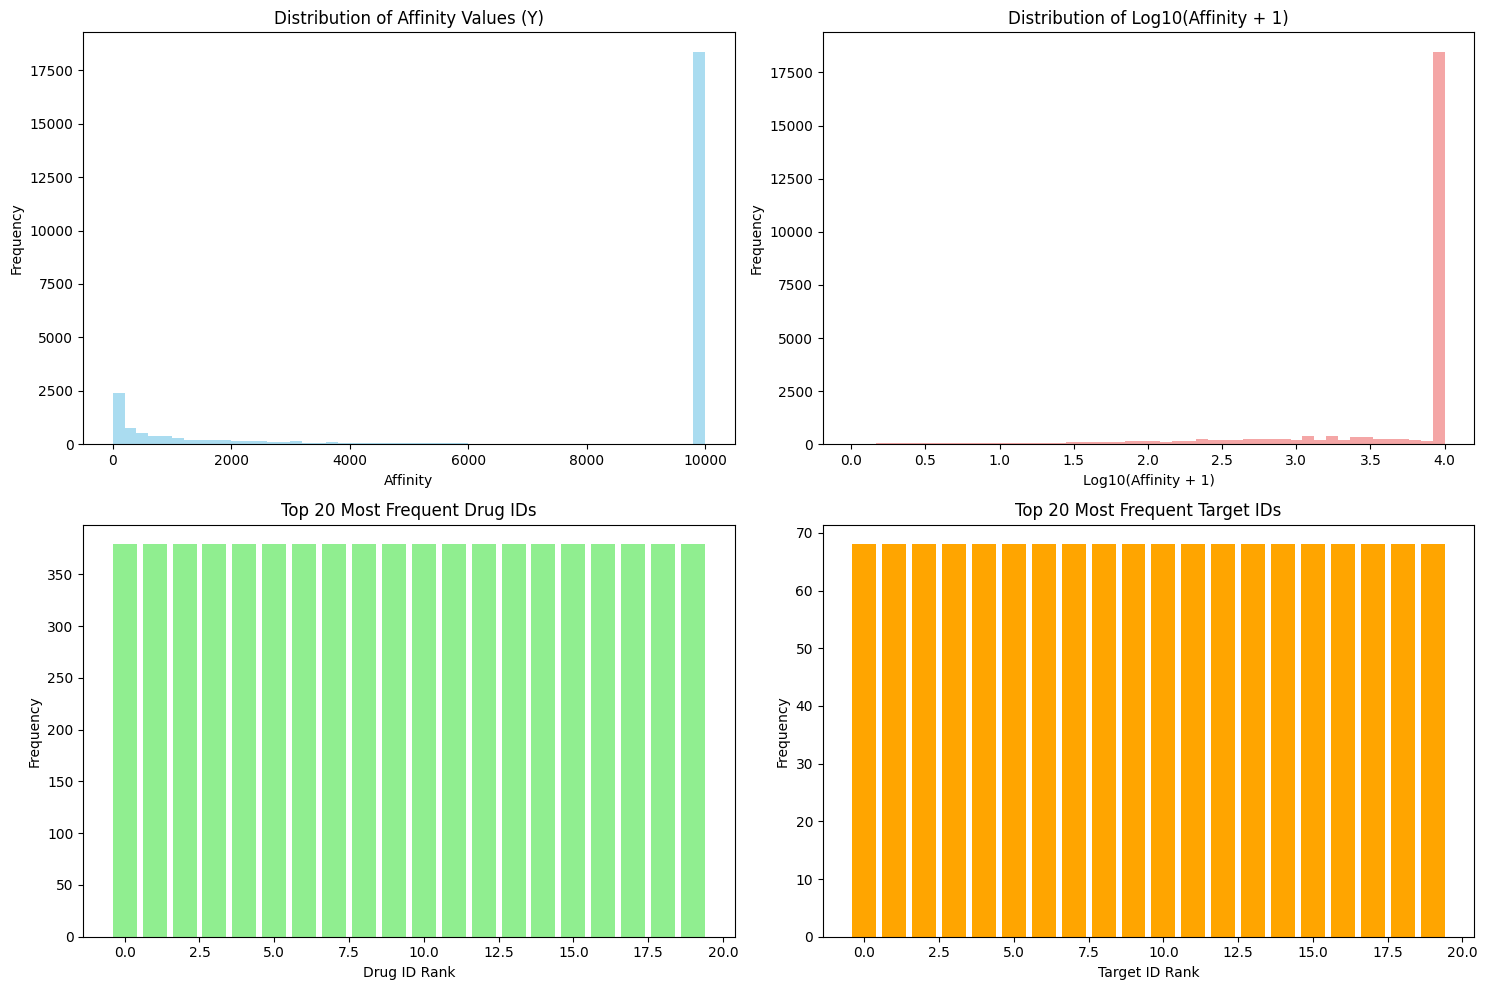

In [7]:
# Distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Affinity distribution
axes[0, 0].hist(df['Y'], bins=50, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Distribution of Affinity Values (Y)')
axes[0, 0].set_xlabel('Affinity')
axes[0, 0].set_ylabel('Frequency')

# Log-transformed affinity distribution
axes[0, 1].hist(np.log10(df['Y'] + 1), bins=50, alpha=0.7, color='lightcoral')
axes[0, 1].set_title('Distribution of Log10(Affinity + 1)')
axes[0, 1].set_xlabel('Log10(Affinity + 1)')
axes[0, 1].set_ylabel('Frequency')

# Drug ID frequency
drug_counts = df['Drug_ID'].value_counts().head(20)
axes[1, 0].bar(range(len(drug_counts)), drug_counts.values, color='lightgreen')
axes[1, 0].set_title('Top 20 Most Frequent Drug IDs')
axes[1, 0].set_xlabel('Drug ID Rank')
axes[1, 0].set_ylabel('Frequency')

# Target ID frequency
target_counts = df['Target_ID'].value_counts().head(20)
axes[1, 1].bar(range(len(target_counts)), target_counts.values, color='orange')
axes[1, 1].set_title('Top 20 Most Frequent Target IDs')
axes[1, 1].set_xlabel('Target ID Rank')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [8]:
# Additional distribution analysis
print("=== Affinity Value Analysis ===")
print(f"Min affinity: {df['Y'].min()}")
print(f"Max affinity: {df['Y'].max()}")
print(f"Mean affinity: {df['Y'].mean():.2f}")
print(f"Median affinity: {df['Y'].median():.2f}")
print(f"Standard deviation: {df['Y'].std():.2f}")

print("\n=== Sequence Length Analysis ===")
smiles_lengths = df['Drug'].str.len()
fasta_lengths = df['Target'].str.len()

print(f"SMILES length - Min: {smiles_lengths.min()}, Max: {smiles_lengths.max()}, Mean: {smiles_lengths.mean():.2f}")
print(f"FASTA length - Min: {fasta_lengths.min()}, Max: {fasta_lengths.max()}, Mean: {fasta_lengths.mean():.2f}")


=== Affinity Value Analysis ===
Min affinity: 0.016
Max affinity: 10000.0
Mean affinity: 7558.11
Median affinity: 10000.00
Standard deviation: 3990.01

=== Sequence Length Analysis ===
SMILES length - Min: 32, Max: 81, Mean: 54.18
FASTA length - Min: 244, Max: 2549, Mean: 744.85


## 4. Feature Extraction Functions


In [9]:
# SMILES-based feature extraction functions
def extract_smiles_features(smiles):
    """Extract molecular features from SMILES string"""
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return {
                'molecular_weight': None,
                'num_atoms': None,
                'num_bonds': None,
                'num_rings': None,
                'num_aromatic_rings': None,
                'logp': None,
                'tpsa': None,
                'hbd': None,
                'hba': None
            }
        
        return {
            'molecular_weight': Descriptors.MolWt(mol),
            'num_atoms': mol.GetNumAtoms(),
            'num_bonds': mol.GetNumBonds(),
            'num_rings': Descriptors.RingCount(mol),
            'num_aromatic_rings': Descriptors.NumAromaticRings(mol),
            'logp': Descriptors.MolLogP(mol),
            'tpsa': Descriptors.TPSA(mol),
            'hbd': Descriptors.NumHDonors(mol),
            'hba': Descriptors.NumHAcceptors(mol)
        }
    except:
        return {
            'molecular_weight': None,
            'num_atoms': None,
            'num_bonds': None,
            'num_rings': None,
            'num_aromatic_rings': None,
            'logp': None,
            'tpsa': None,
            'hbd': None,
            'hba': None
        }

def extract_fasta_features(fasta):
    """Extract protein features from FASTA sequence"""
    try:
        if pd.isna(fasta) or fasta == '':
            return {
                'sequence_length': None,
                'molecular_weight': None,
                'isoelectric_point': None,
                'aromaticity': None,
                'instability_index': None,
                'gravy': None
            }
        
        # Create ProteinAnalysis object
        protein_analysis = ProteinAnalysis(fasta)
        
        return {
            'sequence_length': len(fasta),
            'molecular_weight': protein_analysis.molecular_weight(),
            'isoelectric_point': protein_analysis.isoelectric_point(),
            'aromaticity': protein_analysis.aromaticity(),
            'instability_index': protein_analysis.instability_index(),
            'gravy': protein_analysis.gravy()
        }
    except:
        return {
            'sequence_length': None,
            'molecular_weight': None,
            'isoelectric_point': None,
            'aromaticity': None,
            'instability_index': None,
            'gravy': None
        }

print("Feature extraction functions defined successfully!")


Feature extraction functions defined successfully!


In [10]:
# Test feature extraction on a few examples
print("=== Testing Feature Extraction ===")

# Test SMILES feature extraction
sample_smiles = df['Drug'].iloc[0]
print(f"Sample SMILES: {sample_smiles}")
smiles_features = extract_smiles_features(sample_smiles)
print("SMILES Features:")
for key, value in smiles_features.items():
    print(f"  {key}: {value}")

print()

# Test FASTA feature extraction
sample_fasta = df['Target'].iloc[0]
print(f"Sample FASTA (first 100 chars): {sample_fasta[:100]}...")
fasta_features = extract_fasta_features(sample_fasta)
print("FASTA Features:")
for key, value in fasta_features.items():
    print(f"  {key}: {value}")


=== Testing Feature Extraction ===
Sample SMILES: Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12
SMILES Features:
  molecular_weight: 358.445
  num_atoms: 27
  num_bonds: 30
  num_rings: 4
  num_aromatic_rings: 4
  logp: 3.8821200000000022
  tpsa: 76.82
  hbd: 2
  hba: 4

Sample FASTA (first 100 chars): MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGH...
FASTA Features:
  sequence_length: 961
  molecular_weight: 103883.71650000001
  isoelectric_point: 6.158641242980956
  aromaticity: 0.053069719042663895
  instability_index: 56.52759625390253
  gravy: -0.5196670135275755


## 5. Apply Feature Extraction to Sample Data


In [11]:
# Apply feature extraction to a sample of the data (first 100 rows for demonstration)
print("Extracting features from sample data (first 100 rows)...")
sample_df = df.head(100).copy()

# Extract SMILES features
print("Extracting SMILES features...")
smiles_features_list = []
for smiles in sample_df['Drug']:
    features = extract_smiles_features(smiles)
    smiles_features_list.append(features)

# Convert to DataFrame
smiles_features_df = pd.DataFrame(smiles_features_list)
smiles_features_df.columns = ['smiles_' + col for col in smiles_features_df.columns]

# Extract FASTA features
print("Extracting FASTA features...")
fasta_features_list = []
for fasta in sample_df['Target']:
    features = extract_fasta_features(fasta)
    fasta_features_list.append(features)

# Convert to DataFrame
fasta_features_df = pd.DataFrame(fasta_features_list)
fasta_features_df.columns = ['fasta_' + col for col in fasta_features_df.columns]

# Combine all features
features_df = pd.concat([sample_df, smiles_features_df, fasta_features_df], axis=1)

print(f"\nCombined dataset shape: {features_df.shape}")
print(f"New columns added: {len(smiles_features_df.columns) + len(fasta_features_df.columns)}")
print("\nFirst few rows of features:")
features_df.head()


Extracting features from sample data (first 100 rows)...
Extracting SMILES features...
Extracting FASTA features...

Combined dataset shape: (100, 20)
New columns added: 15

First few rows of features:


,Drug_ID,Drug,Target_ID,Target,Y,smiles_molecular_weight,smiles_num_atoms,smiles_num_bonds,smiles_num_rings,smiles_num_aromatic_rings,smiles_logp,smiles_tpsa,smiles_hbd,smiles_hba,fasta_sequence_length,fasta_molecular_weight,fasta_isoelectric_point,fasta_aromaticity,fasta_instability_index,fasta_gravy
0,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,43.0,358.445,27,30,4,4,3.88212,76.82,2,4,961,103883.7165,6.158641,0.053070,56.527596,-0.519667
1,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ABL1p,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,10000.0,358.445,27,30,4,4,3.88212,76.82,2,4,1167,127255.9206,8.989488,0.067695,51.334542,-0.618081
2,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ABL2,MVLGTVLLPPNSYGRDQDTSLCCLCTEASESALPDLTDHFASCVED...,10000.0,358.445,27,30,4,4,3.88212,76.82,2,4,1167,126682.7762,6.817974,0.067695,49.255621,-0.452442
3,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ACVR1,MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...,10000.0,358.445,27,30,4,4,3.88212,76.82,2,4,509,57152.2619,7.117572,0.078585,44.405914,-0.180157
4,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ACVR1B,MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...,10000.0,358.445,27,30,4,4,3.88212,76.82,2,4,505,56805.9398,6.602042,0.087129,44.066158,-0.093663


In [12]:
# Analyze the extracted features
print("=== Feature Analysis ===")

# SMILES features analysis
print("\nSMILES Features Summary:")
smiles_numeric = smiles_features_df.select_dtypes(include=[np.number])
print(smiles_numeric.describe())

print("\nFASTA Features Summary:")
fasta_numeric = fasta_features_df.select_dtypes(include=[np.number])
print(fasta_numeric.describe())

# Check for missing values in features
print("\nMissing values in SMILES features:")
print(smiles_features_df.isnull().sum())

print("\nMissing values in FASTA features:")
print(fasta_features_df.isnull().sum())


=== Feature Analysis ===

SMILES Features Summary:
       smiles_molecular_weight  smiles_num_atoms  smiles_num_bonds  \
count             1.000000e+02             100.0             100.0   
mean              3.584450e+02              27.0              30.0   
std               5.712979e-14               0.0               0.0   
min               3.584450e+02              27.0              30.0   
25%               3.584450e+02              27.0              30.0   
50%               3.584450e+02              27.0              30.0   
75%               3.584450e+02              27.0              30.0   
max               3.584450e+02              27.0              30.0   

       smiles_num_rings  smiles_num_aromatic_rings   smiles_logp  \
count             100.0                      100.0  1.000000e+02   
mean                4.0                        4.0  3.882120e+00   
std                 0.0                        0.0  1.785306e-15   
min                 4.0                       

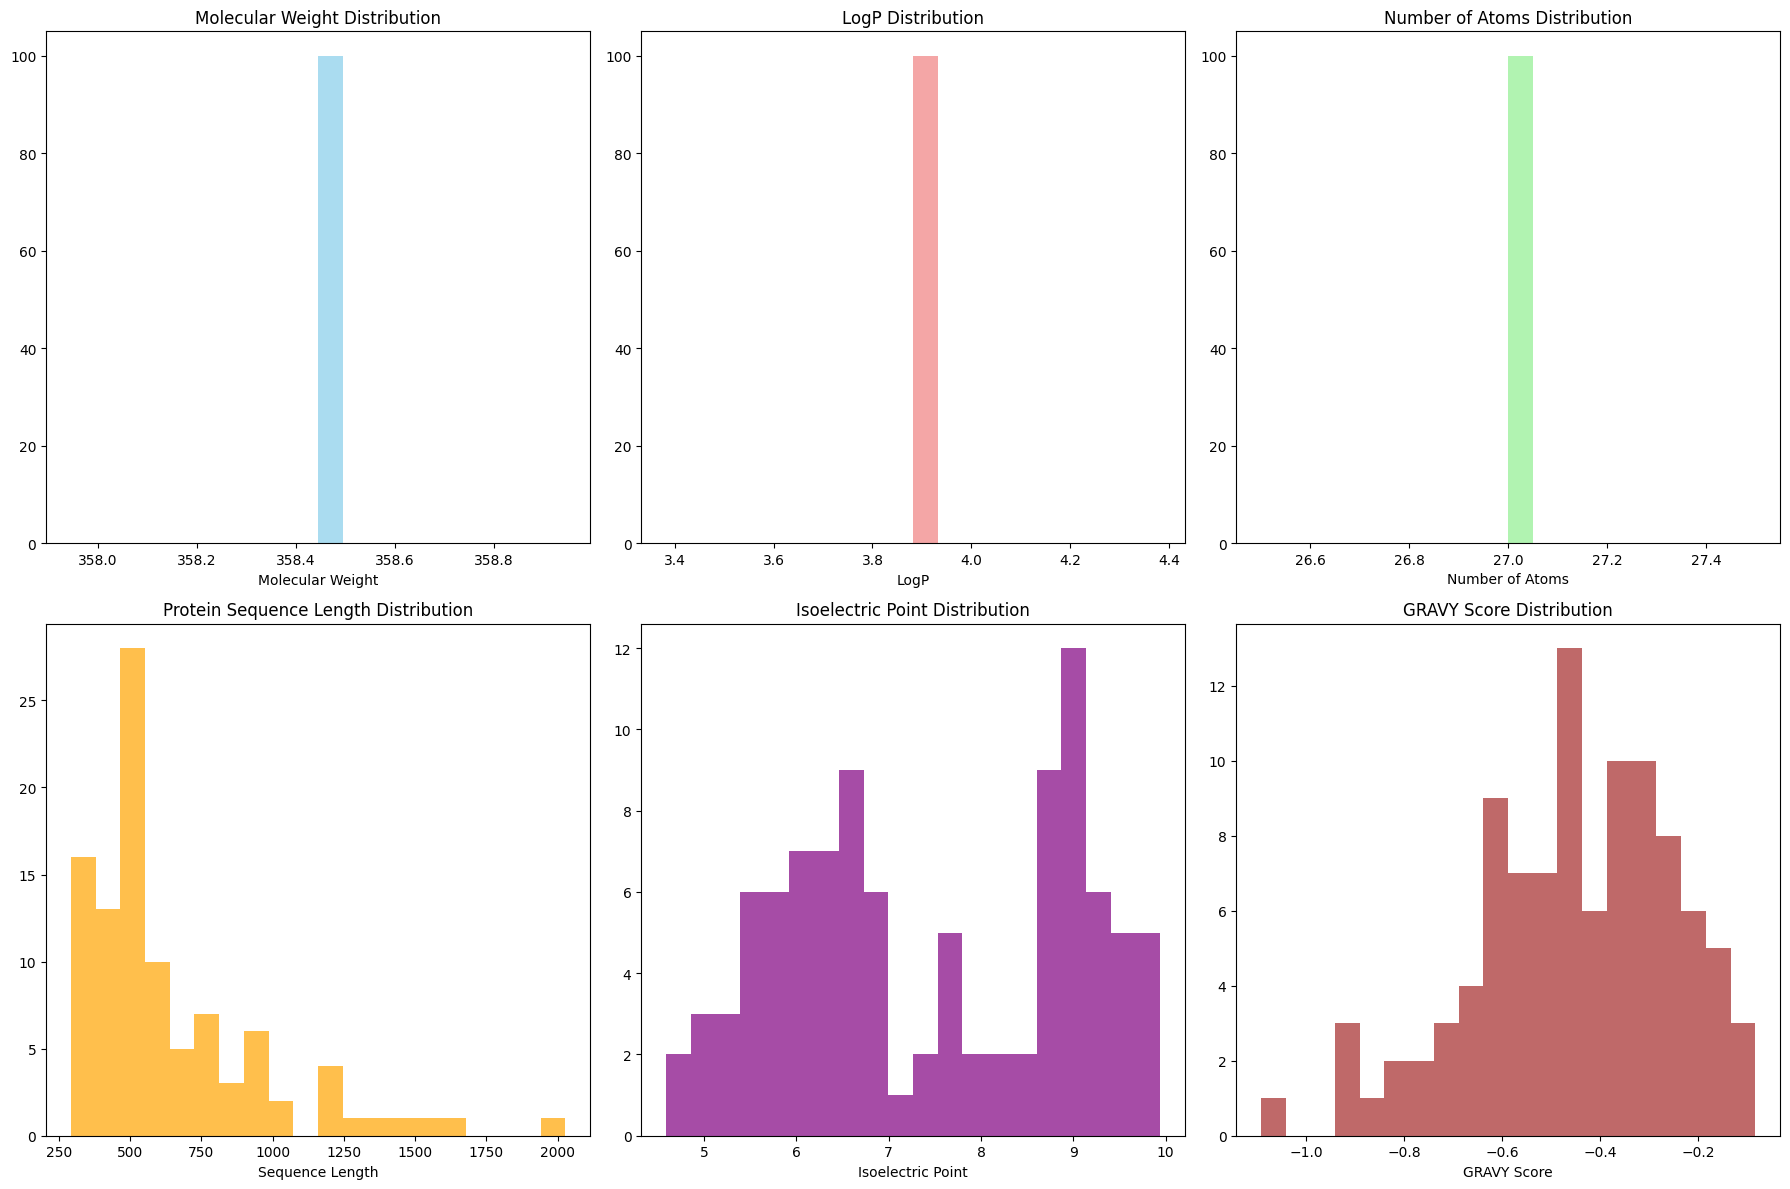

In [13]:
# Visualize some of the extracted features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# SMILES features
axes[0, 0].hist(smiles_features_df['smiles_molecular_weight'].dropna(), bins=20, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Molecular Weight Distribution')
axes[0, 0].set_xlabel('Molecular Weight')

axes[0, 1].hist(smiles_features_df['smiles_logp'].dropna(), bins=20, alpha=0.7, color='lightcoral')
axes[0, 1].set_title('LogP Distribution')
axes[0, 1].set_xlabel('LogP')

axes[0, 2].hist(smiles_features_df['smiles_num_atoms'].dropna(), bins=20, alpha=0.7, color='lightgreen')
axes[0, 2].set_title('Number of Atoms Distribution')
axes[0, 2].set_xlabel('Number of Atoms')

# FASTA features
axes[1, 0].hist(fasta_features_df['fasta_sequence_length'].dropna(), bins=20, alpha=0.7, color='orange')
axes[1, 0].set_title('Protein Sequence Length Distribution')
axes[1, 0].set_xlabel('Sequence Length')

axes[1, 1].hist(fasta_features_df['fasta_isoelectric_point'].dropna(), bins=20, alpha=0.7, color='purple')
axes[1, 1].set_title('Isoelectric Point Distribution')
axes[1, 1].set_xlabel('Isoelectric Point')

axes[1, 2].hist(fasta_features_df['fasta_gravy'].dropna(), bins=20, alpha=0.7, color='brown')
axes[1, 2].set_title('GRAVY Score Distribution')
axes[1, 2].set_xlabel('GRAVY Score')

plt.tight_layout()
plt.show()


## 6. Summary and Next Steps


In [14]:
print("=== Dataset Summary ===")
print(f"Original dataset: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"Unique drugs: {df['Drug_ID'].nunique()}")
print(f"Unique targets: {df['Target_ID'].nunique()}")
print(f"Affinity range: {df['Y'].min()} - {df['Y'].max()}")

print("\n=== Feature Extraction Summary ===")
print(f"SMILES features extracted: {len(smiles_features_df.columns)}")
print(f"FASTA features extracted: {len(fasta_features_df.columns)}")
print(f"Total features added: {len(smiles_features_df.columns) + len(fasta_features_df.columns)}")

print("\n=== Next Steps ===")
print("1. Apply feature extraction to the full dataset")
print("2. Handle missing values in extracted features")
print("3. Perform correlation analysis between features and affinity")
print("4. Build machine learning models for affinity prediction")
print("5. Evaluate model performance using appropriate metrics")


=== Dataset Summary ===
Original dataset: 25772 rows, 5 columns
Unique drugs: 68
Unique targets: 379
Affinity range: 0.016 - 10000.0

=== Feature Extraction Summary ===
SMILES features extracted: 9
FASTA features extracted: 6
Total features added: 15

=== Next Steps ===
1. Apply feature extraction to the full dataset
2. Handle missing values in extracted features
3. Perform correlation analysis between features and affinity
4. Build machine learning models for affinity prediction
5. Evaluate model performance using appropriate metrics
